# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
!pip install citipy



In [20]:
#Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
city_weather_df = pd.DataFrame({"City":cities})

city_weather_df['Cloudiness'] = ""
city_weather_df['Country'] = ""
city_weather_df['Date'] = ""
city_weather_df['Humidity'] = ""
city_weather_df['Lat'] = ""
city_weather_df['Lng'] = ""
city_weather_df['Max Temp'] = ""
city_weather_df['Wind Speed'] = ""


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


for index,row in city_weather_df.iterrows():
    city = row['City']
    set_index = 1
    
    i = (index // 60)
    if i >=1:
        set = i + 1
        
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        cities_weather = requests.get(query_url).json()
        print(f'Processing Record {index} of set index {set} | {city}' )
        city_weather_df.loc[index, 'Cloudiness'] = cities_weather['clouds']['all']
        city_weather_df.loc[index, 'Country'] = cities_weather['sys']['country']
        city_weather_df.loc[index, 'Date'] = cities_weather['dt']
        city_weather_df.loc[index, 'Humidity'] = cities_weather['main']['humidity']
        city_weather_df.loc[index, 'Lat'] = cities_weather['coord']['lat']
        city_weather_df.loc[index, 'Lng'] = cities_weather['coord']['lon']
        city_weather_df.loc[index, 'Max Temp'] = cities_weather['main']['temp_max']
        city_weather_df.loc[index, 'Wind Speed'] = cities_weather['wind']['speed']
        
    except (KeyError, IndexError):
        print("City NOT found. Skipping.")
        

Processing Record 0 of set index <class 'set'> | louisbourg
City NOT found. Skipping.
Processing Record 1 of set index <class 'set'> | mataura
Processing Record 2 of set index <class 'set'> | birao
Processing Record 3 of set index <class 'set'> | college
Processing Record 4 of set index <class 'set'> | hobart
Processing Record 5 of set index <class 'set'> | faya
Processing Record 6 of set index <class 'set'> | grand river south east
City NOT found. Skipping.
Processing Record 7 of set index <class 'set'> | bluff
Processing Record 8 of set index <class 'set'> | tsihombe
City NOT found. Skipping.
Processing Record 9 of set index <class 'set'> | junin
Processing Record 10 of set index <class 'set'> | vaini
Processing Record 11 of set index <class 'set'> | almaznyy
Processing Record 12 of set index <class 'set'> | haines junction
Processing Record 13 of set index <class 'set'> | torbay
Processing Record 14 of set index <class 'set'> | thompson
Processing Record 15 of set index <class 'set'

Processing Record 149 of set index 3 | fortuna
Processing Record 150 of set index 3 | las vegas
Processing Record 151 of set index 3 | wa
City NOT found. Skipping.
Processing Record 152 of set index 3 | tual
Processing Record 153 of set index 3 | westport
Processing Record 154 of set index 3 | georgetown
Processing Record 155 of set index 3 | quatre cocos
Processing Record 156 of set index 3 | east london
Processing Record 157 of set index 3 | new kensington
Processing Record 158 of set index 3 | esperance
Processing Record 159 of set index 3 | tshikapa
Processing Record 160 of set index 3 | toliary
City NOT found. Skipping.
Processing Record 161 of set index 3 | meyungs
City NOT found. Skipping.
Processing Record 162 of set index 3 | salinopolis
Processing Record 163 of set index 3 | umm lajj
Processing Record 164 of set index 3 | saint-philippe
Processing Record 165 of set index 3 | fez
Processing Record 166 of set index 3 | kruisfontein
Processing Record 167 of set index 3 | acari
P

Processing Record 311 of set index 6 | doha
Processing Record 312 of set index 6 | flinders
Processing Record 313 of set index 6 | lagoa
Processing Record 314 of set index 6 | pevek
Processing Record 315 of set index 6 | bourail
Processing Record 316 of set index 6 | mys shmidta
City NOT found. Skipping.
Processing Record 317 of set index 6 | port elizabeth
Processing Record 318 of set index 6 | ampanihy
Processing Record 319 of set index 6 | asfi
City NOT found. Skipping.
Processing Record 320 of set index 6 | los llanos de aridane
Processing Record 321 of set index 6 | vuktyl
Processing Record 322 of set index 6 | isangel
Processing Record 323 of set index 6 | shakawe
Processing Record 324 of set index 6 | ust-nera
Processing Record 325 of set index 6 | maragogi
Processing Record 326 of set index 6 | gravdal
Processing Record 327 of set index 6 | port blair
Processing Record 328 of set index 6 | adrar
Processing Record 329 of set index 6 | north myrtle beach
Processing Record 330 of 

Processing Record 471 of set index 8 | roebourne
Processing Record 472 of set index 8 | pimentel
Processing Record 473 of set index 8 | makakilo city
Processing Record 474 of set index 8 | linjiang
Processing Record 475 of set index 8 | dudinka
Processing Record 476 of set index 8 | chuy
Processing Record 477 of set index 8 | fare
Processing Record 478 of set index 8 | eyemouth
Processing Record 479 of set index 8 | puerto carreno
Processing Record 480 of set index 9 | iquitos
Processing Record 481 of set index 9 | simao
Processing Record 482 of set index 9 | port hardy
Processing Record 483 of set index 9 | panguna
Processing Record 484 of set index 9 | baherden
Processing Record 485 of set index 9 | montepuez
Processing Record 486 of set index 9 | kalmunai
Processing Record 487 of set index 9 | san pedro
Processing Record 488 of set index 9 | socorro
Processing Record 489 of set index 9 | lasa
Processing Record 490 of set index 9 | nhamunda
Processing Record 491 of set index 9 | baly

In [10]:
city_weather_df['Country'].replace('', np.nan, inplace=True)
city_weather_df.dropna(subset=['Country'], inplace=True)
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,mataura,0,NZ,1554661769,70,-46.19,168.86,-2.52,1.26
2,birao,0,CF,1554661769,20,10.3,22.78,29.53,2.56
3,college,1,US,1554661526,51,64.86,-147.8,5.56,2.6
4,hobart,20,AU,1554661516,61,-42.88,147.33,10,3.1
5,faya,0,SA,1554660000,77,18.39,42.45,20,2.1


In [11]:
city_weather_df.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [21]:
city_weather_df.to_csv(output_data_file, encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

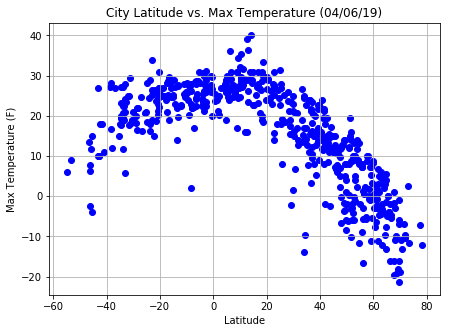

In [40]:
plt.figure(figsize=(7,5))
plt.scatter(city_weather_df["Lat"],city_weather_df["Max Temp"], color= 'blue')
plt.title(f'City Latitude vs. Max Temperature (04/06/19)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('LatitudevsTemperature.png')

#### Latitude vs. Humidity Plot

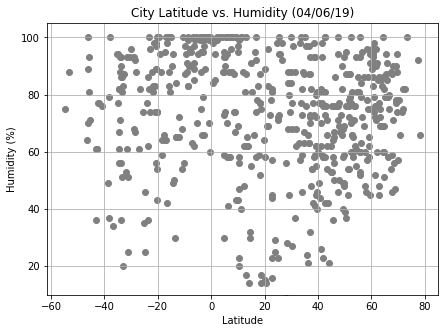

In [41]:
plt.figure(figsize=(7,5))
plt.scatter(city_weather_df["Lat"],city_weather_df["Humidity"], color= 'gray')
plt.title(f'City Latitude vs. Humidity (04/06/19)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.ylim(10,105)
plt.grid()
plt.savefig('LatitudevsHumidity.png')

#### Latitude vs. Cloudiness Plot

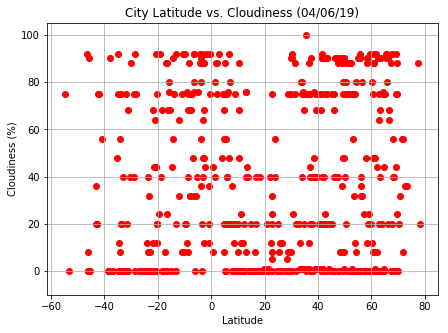

In [47]:
plt.figure(figsize=(7,5))
plt.scatter(city_weather_df["Lat"],city_weather_df["Cloudiness"], color= 'red')
plt.title(f'City Latitude vs. Cloudiness (04/06/19)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylim(-10,105)
plt.grid()
plt.savefig('LatitudevsCloudiness.png')

#### Latitude vs. Wind Speed Plot

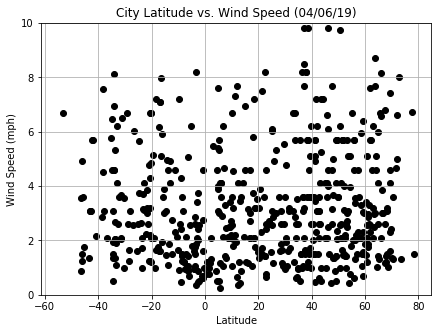

In [51]:
plt.figure(figsize=(7,5))
plt.scatter(city_weather_df["Lat"],city_weather_df["Wind Speed"], color= 'black')
plt.title(f'City Latitude vs. Wind Speed (04/06/19)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylim(-0,10)
plt.grid()
plt.savefig('LatitudevsWindSpeed.png')